# Netflix Data: Cleaning, Analysis and Visualisation

## 1.0 Discussing the dataset
There is a single dataset that is being used, the netflix1.csv. This file was obtained from [Kaggle](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization) and it is an already cleaned version of another file.

This data set consist on contents added to Netflix from 2008 to 2021. The variables of this data set are:
- *show_id*: Netflix ID of the media.
- *Type*: Movie or TV Show.
- *title*: Title of the media.
- *director*: Director of the media.
- *country*: Country in which the movie was made.
- *date_added*: Date in which the media was added.
- *release_year*: Year in which the media was released.
- *rating*: Age rating of the media.
- *duration*: Duration of the media.
- *listen_in*: Classification given by Netflix.

## 2.0 Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3.0 Gathering
In this section of the report, we will gather the dataset and turn it into a DataFrame.

In [3]:
# Importing the data from a csv file to a DataFrame
df = pd.read_csv('netflix1.csv')
# Showing the first five values of the DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## 4.0 Assessing
This section of the report we will assess any issues the data may have.

In [4]:
# Let's check the status of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# Checking if there are any duplicates
df.duplicated().value_counts()

False    8790
dtype: int64

In [7]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


In [8]:
# Let's perform a basic visual analysis of the data.
# pd.set_option('display.max_rows', 220)
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


### 4.1 Assessment & Categorising

#### 4.1.1 Quality issue
- Variable 'date_added' has the wrong data type.

#### 4.1.2 Tidiness issue
- The 'listed_in' variable has several categories in a single observation.
- There are two types of observations, TV shows and movies.

## 5.0 Cleaning
In this section of the report we will solve the quality and tidiness issues mentioned in the assessment.

In [9]:
# Before cleaning, lets make a copy of the dataframe.
df_clean = df.copy()

### 5.1 'date_added' variable has wrong data type

#### 5.1.1 Define
The variable 'date_added' has been categorised as an object (string), the most appropriate type of data for this variable would be datetime.

#### 5.1.2 Code

In [10]:
df_clean.date_added = pd.to_datetime(df_clean.date_added)

#### 5.1.3 Test

In [11]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


### 5.2 'listed_in' variable has several variables

#### 5.2.1 Define
The 'listed_in' variable can have several categories per media, we would like to create new variables to be able to extract this and correctly filter the data. We will assume that the first category would be the 'main' category of the movie.

#### 5.2.2 Code

In [57]:
df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]



<ipython-input-57-33ca54a82fed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
<ipython-input-57-33ca54a82fed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
<ipython-input-57-33ca54a82fed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in3'][i] = 0
<ipython-input-57-33ca54a82fed>:18: SettingWithCopyWarning: 
A value is trying to be set on

#### 5.2.3 Test

In [58]:
df_clean

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


### 5.3 Two different observation on a single dataset

#### 5.3.1 Define
There are two different types of observations in a single data set: TV Shows and Movies. The solution would be to split the dataset into two.

#### 5.3.2 Code

In [60]:
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

#### 5.3.3 Test

In [61]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries


In [62]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


## 6.0 Storing
In this step we will store the dataframes into CSV files.

In [63]:
df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

## 7.0 Analysing and Visualisation of Data
In this section of the report we will explore the answers for the following questions:
- Which country produced the most of Netflix's media?
- What is the most popular rating for most of Netflix's media?
- What is the most popular genre for Netflix's media?
- What is the most popular sub-genre for Netflix's media?
- Has the years changed any of the previous questions?
- What is the most common length for Netflix's content?

### 7.1 TV Shows

In [76]:
#Let's check how many countries have produced a TV Show for Netlix
len(df_tv.groupby('country').count().index)

59

Text(0, 0.5, 'Number of TV Shows')

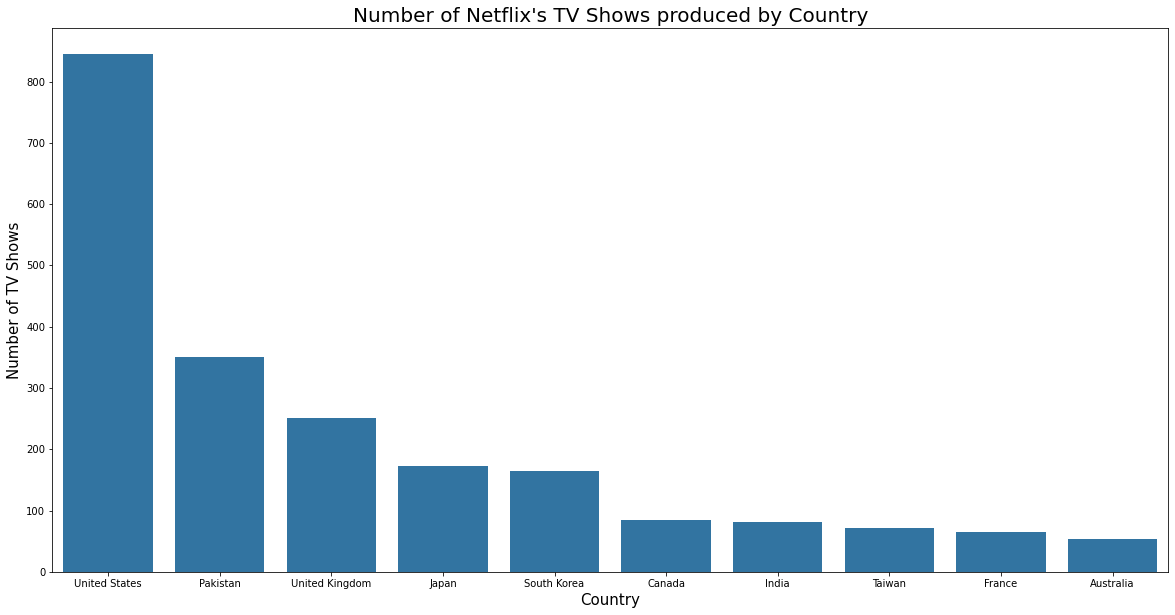

In [110]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
plt.figure(figsize=[20,10])
base_color = base_color = sns.color_palette()[0]
tv_c = sns.countplot(x='country',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by Country",fontsize = 20)
tv_c.set_xlabel('Country',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)


In [111]:
df_tv.release_year.min()

1925

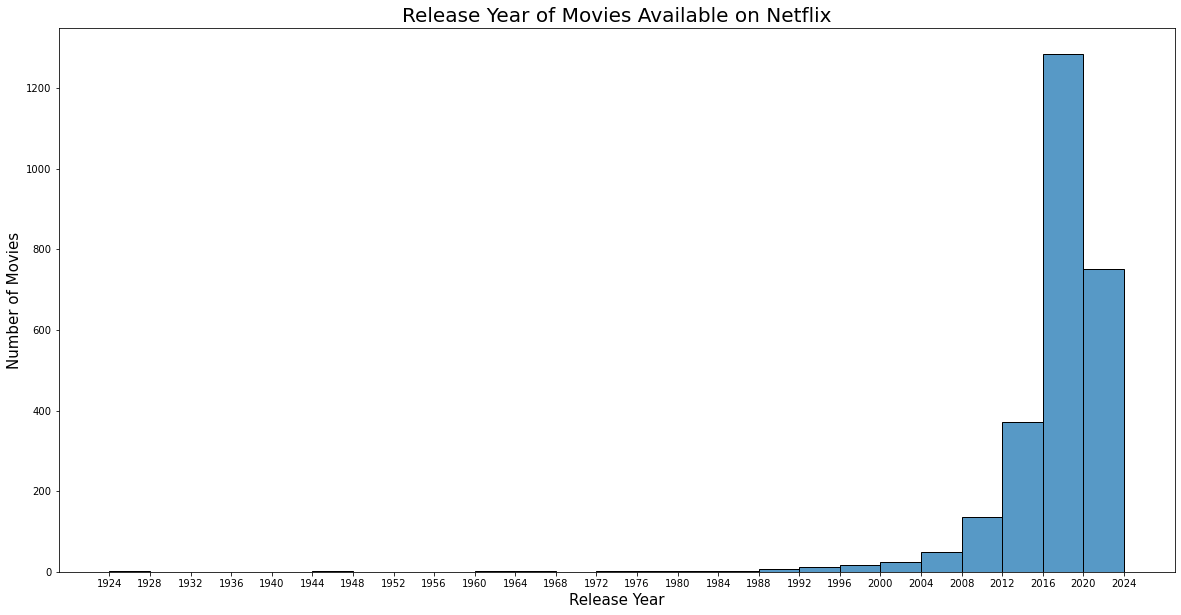

In [135]:
bins=np.arange(1924,2025,4)
plt.figure(figsize=[20,10])
tw_AR = sns.histplot(data=df_tv, x ='release_year',  bins = bins, color=base_color);
tw_AR.set_xlabel("Release Year", fontsize = 15)
tw_AR.set_ylabel("Number of Movies", fontsize = 15)
tw_AR.set_title("Release Year of Movies Available on Netflix", fontsize = 20)
plt.xticks(np.arange(1924,2025,4));

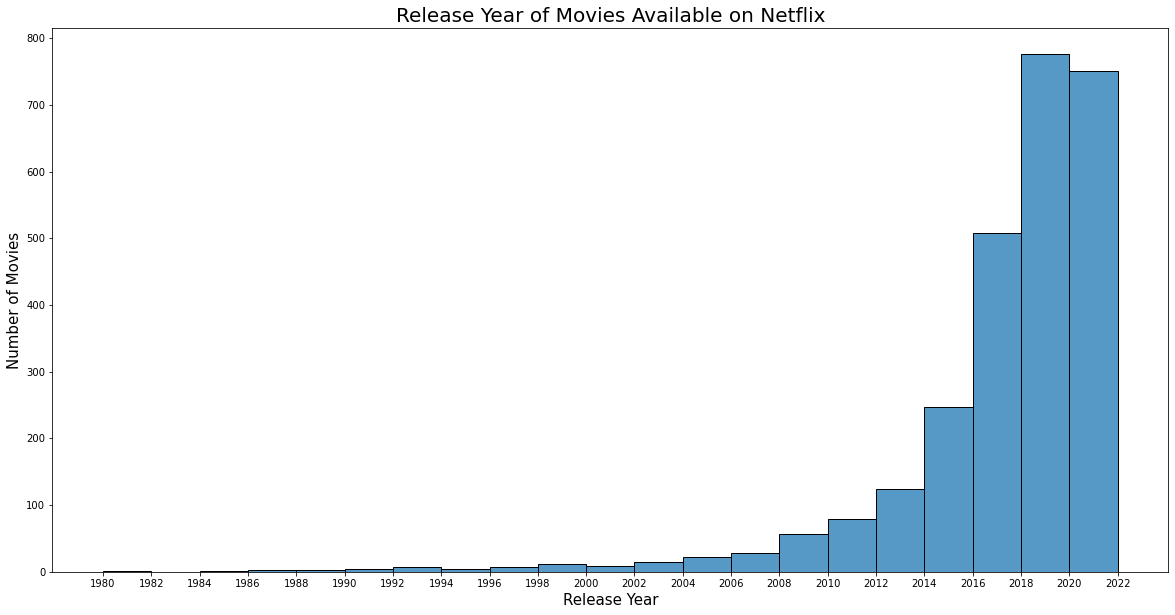

In [134]:
# Reducing the size of the bins to remove the movies that were released before 1980 (too few)
bins=np.arange(1980,2023,2)
plt.figure(figsize=[20,10])
tw_AR = sns.histplot(data=df_tv, x ='release_year',  bins = bins, color=base_color);
tw_AR.set_xlabel("Release Year", fontsize = 15)
tw_AR.set_ylabel("Number of Movies", fontsize = 15)
tw_AR.set_title("Release Year of Movies Available on Netflix", fontsize = 20)
plt.xticks(np.arange(1980,2023,2));

In [105]:
#Let's the distribution of the release dates of movies on Netflix
len(df_tv.groupby('release_year').count().index)

46

Text(0, 0.5, 'Number of TV Shows')

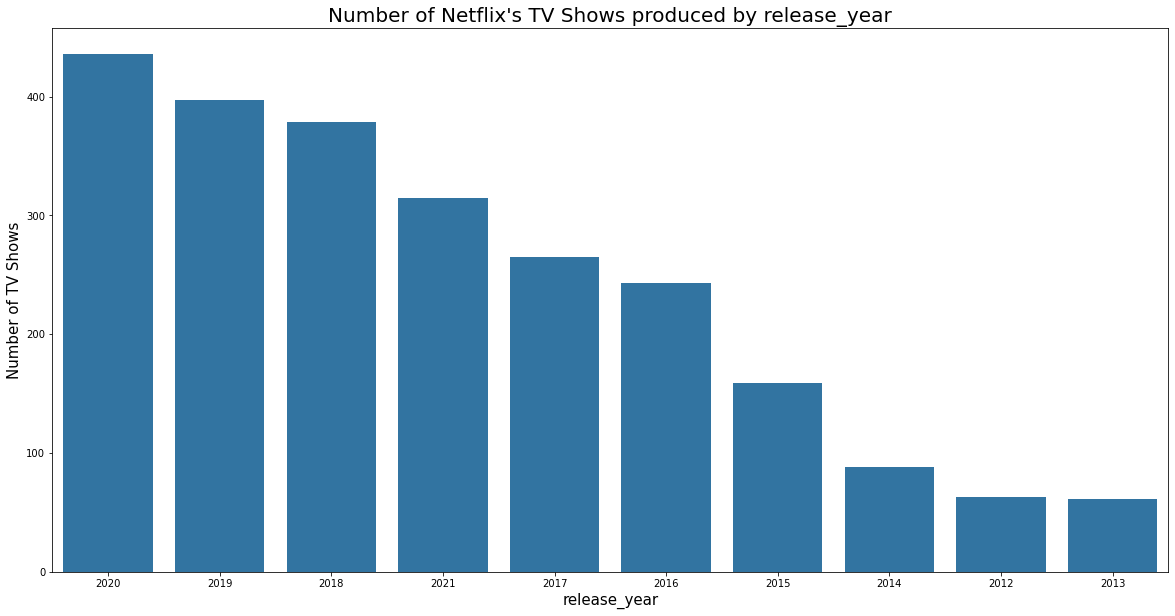

In [102]:
sort_order = df_tv.groupby('release_year').count().sort_values(by = 'show_id',ascending=False)[0:10].index
plt.figure(figsize=[20,10])
df_tv_y = df_tv[df_tv['release_year'].isin(sort_order)]
tv_c = sns.countplot(x='release_year',data=df_tv_y,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by release_year",fontsize = 20)
tv_c.set_xlabel('release_year',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)